In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="OIpaEoYBqWcCpULTz970")
project = rf.workspace("shshinc").project("study-timer")
dataset = project.version(1).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 577 kB/s 
     |████████████████████████████████| 178 kB 13.4 MB/s 
     |████████████████████████████████| 54 kB 3.5 MB/s 
     |████████████████████████████████| 145 kB 60.9 MB/s 
     |████████████████████████████████| 67 kB 7.0 MB/s 
     |████████████████████████████████| 138 kB 68.8 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=4f8bdf6c7fd126d633d836d891c68bb7ae36667c708264e06a9db7cd3c7dee81
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: certifi
    Found existing installation: certi

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to study-timer-1 in yolov5pytorch:: 100%|██████████| 1378/1378 [00:00<00:00, 2229.58it/s]


In [ ]:
%cd /content
!git clone https://github.com/ultralytics/yolov5.git


/content
Cloning into 'yolov5'...
remote: Enumerating objects: 15093, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 15093 (delta 0), reused 3 (delta 0), pack-reused 15088
Receiving objects: 100% (15093/15093), 13.68 MiB | 27.91 MiB/s, done.
Resolving deltas: 100% (10433/10433), done.


In [ ]:
%cd /content/yolov5/

!pip install -r requirements.txt


/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 6.4 MB/s 


In [ ]:
%cat /content/study-timer-1/data.yaml

names:
- Mobile phone
- hand
- pen
nc: 3
roboflow:
  license: CC BY 4.0
  project: study-timer
  url: https://universe.roboflow.com/project/study-timer/dataset/1
  version: 1
  workspace: project
test: study-timer-1/test/images
train: study-timer-1/train/images
val: study-timer-1/valid/images
valid: /content/study-timer-1/valid/images


In [ ]:
%cd /
from glob import glob

train_img_list = glob('/content/study-timer-1/train/images/*.jpg')
print(len(train_img_list))
test_img_list = glob('/content/study-timer-1/test/images/*.jpg')
print(len(test_img_list))
valid_img_list = glob('/content/study-timer-1/valid/images/*.jpg')
print(len(valid_img_list))

/
485
63
135


In [ ]:
with open('/content/study-timer-1/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/study-timer-1/test.txt', 'w') as f:
  f.write('\n'.join(valid_img_list) + '\n')

In [ ]:
import yaml

with open('/content/study-timer-1/data.yaml', 'r') as f:
  data = yaml.safe_load(f)

print(data)

data['train'] = '/content/study-timer-1/train/images'
data['test'] = '/content/study-timer-1/test/images'
data['val'] = '/content/study-timer-1/valid/images'

with open('/content/study-timer-1/data.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)

{'names': ['Mobile phone', 'hand', 'pen'], 'nc': 3, 'roboflow': {'license': 'CC BY 4.0', 'project': 'study-timer', 'url': 'https://universe.roboflow.com/project/study-timer/dataset/1', 'version': 1, 'workspace': 'project'}, 'test': '/content/study-timer-1/test/images', 'train': '/content/study-timer-1/train/images', 'val': 'study-timer-1/valid/images', 'valid': '/content/study-timer-1/valid/images'}
{'names': ['Mobile phone', 'hand', 'pen'], 'nc': 3, 'roboflow': {'license': 'CC BY 4.0', 'project': 'study-timer', 'url': 'https://universe.roboflow.com/project/study-timer/dataset/1', 'version': 1, 'workspace': 'project'}, 'test': '/content/study-timer-1/test/images', 'train': '/content/study-timer-1/train/images', 'val': '/content/study-timer-1/valid/images', 'valid': '/content/study-timer-1/valid/images'}


In [ ]:
%cd /content/yolov5

!python train.py --img 320 --batch 16 --epochs 30 --data /content/study-timer-1/data.yaml #--weights yolov5x.pt --name study-timer --cfg /content/yolov5/models/yolov5x.yaml

/content/yolov5
train: weights=yolov5s.pt, cfg=, data=/content/study-timer-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-249-gff6e6e3 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0

In [ ]:
!cp -r /content/yolov5/runs/train/exp2 /content/drive/MyDrive/models

In [ ]:
!python /content/yolov5/detect.py --weights /content/yolov5/runs/train/exp2/weights/best.pt --img 320 --conf 0.5 --source /content/drive/MyDrive/sample2.jpg

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/drive/MyDrive/sample2.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-249-gff6e6e3 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/sample2.jpg: 256x320 1 hand, 1 pen, 11.1ms
Speed: 0.4ms pre-process, 11.1ms inference, 1.4ms NMS per image at shape (1, 3, 320, 320)
Results saved to runs/detect/exp3


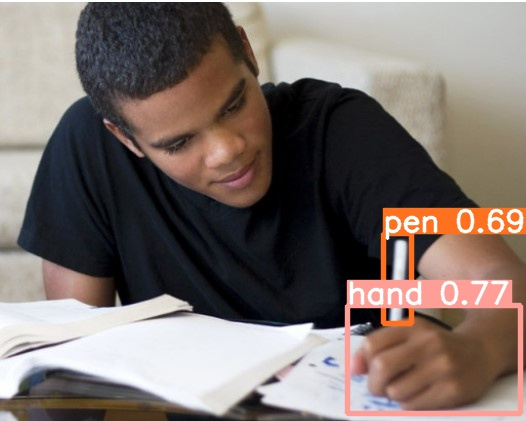

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/yolov5/runs/detect/exp3/sample2.jpg')
cv2_imshow(img)